In [3]:
import random

while(True) :
    v =random.random()
    print(v)
    if v<0.1 :
        break
        

0.04814998649310953


In [5]:
#요소들끼리 더하고 싶다 : element wise add
[1,2,3] +[4,5,6]

[1, 2, 3, 4, 5, 6]

In [7]:
(1,2,3) + (7,4,5)

(1, 2, 3, 7, 4, 5)

List, Dict, Set연산용으로 사용이 불가능, 메모리 사용량이 크고 느리다. 

In [9]:
import numpy


In [12]:
#배열만들기
#함수 사용시 shift+tab로 설명을 봅니다. 
numpy.arange(1,10), numpy.arange(1,10,2)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1, 3, 5, 7, 9]))

In [15]:
#데이터를 numpy 배열로 변환하면 연산이 됩니다. 
numpy.array([1,2,3]) + numpy.array([4,5,6,])

array([5, 7, 9])

야후 파이낸스의 sp500 주식 데이터를 읽습니다. 
csv 혹은 pandas 로 읽을 수 있습니다. 

In [16]:
import pandas

In [18]:
stock = pandas.read_csv('snp500.csv')
stock.shape


(20, 7)

In [23]:
arr = numpy.array(stock)

In [26]:
arr[0] = arr[0, :]

In [29]:
#Open 만 가져오자
op =arr[:,1]
op

array([2841.939941, 2854.02002, 2856.060059, 2836.699951, 2832.409912,
       2830.030029, 2790.25, 2786.939941, 2766.149902, 2751.530029,
       2762.639893, 2818.090088, 2828.51001, 2852.8701170000004,
       2885.830078, 2903.27002, 2882.72998, 2886.23999, 2886.820068,
       2889.75], dtype=object)

In [32]:
#Close를 가져오자
cl =arr[:,4] #도 가능하지만
cl =arr[:,-3] #이 편합니다


cl

array([2840.22998, 2864.360107, 2856.27002, 2822.23999, 2826.060059,
       2802.389893, 2783.02002, 2788.860107, 2752.060059, 2744.449951,
       2803.27002, 2826.149902, 2843.48999, 2873.340088, 2886.72998,
       2885.719971, 2879.840088, 2891.639893, 2886.97998, 2889.669922],
      dtype=object)

In [34]:
# opne ->high -> low -> close 4개의 컬럼만 뽑자
# [시작:끝]
arr[:,1:5]

array([[2841.939941, 2853.860107, 2831.290039, 2840.22998],
       [2854.02002, 2868.8798829999996, 2854.02002, 2864.360107],
       [2856.060059, 2865.469971, 2851.110107, 2856.27002],
       [2836.699951, 2836.699951, 2805.48999, 2822.23999],
       [2832.409912, 2841.360107, 2820.189941, 2826.060059],
       [2830.030029, 2840.51001, 2801.580078, 2802.389893],
       [2790.25, 2792.030029, 2766.060059, 2783.02002],
       [2786.939941, 2799.0, 2776.73999, 2788.860107],
       [2766.149902, 2768.97998, 2750.52002, 2752.060059],
       [2751.530029, 2763.070068, 2728.810059, 2744.449951],
       [2762.639893, 2804.48999, 2762.639893, 2803.27002],
       [2818.090088, 2827.280029, 2800.919922, 2826.149902],
       [2828.51001, 2852.100098, 2822.449951, 2843.48999],
       [2852.8701170000004, 2884.969971, 2852.8701170000004, 2873.340088],
       [2885.830078, 2904.77002, 2885.51001, 2886.72998],
       [2903.27002, 2910.610107, 2878.530029, 2885.719971],
       [2882.72998, 2888.570068

In [37]:
#b(below) 아래쪽에 셀 만들기
#open 의 최대갑스 최소갑스 평균을 구해보자
# 내장함수 : import 없이 바로 사용 가능한 함수
max(cl), min(cl)

(2891.639893, 2744.449951)

축 : axis
2차원 데이터는 2개의 축이 있습니다. 행축, 열축

In [43]:
# axis=0 행, axis=1 열
v4 = arr[:,1:5]
v4.shape
numpy.max(v4,axis=0)

array([2903.27002, 2910.610107, 2887.300049, 2891.639893], dtype=object)

In [60]:
close_v = arr[:,-3]
open_v =arr[:,1]
vol = arr[:,1]
final_v=close_v-open_v
numpy.max(final_v), numpy.argmax(final_v), arr[numpy.argmax(final_v),0]



(40.6301269999999, 10, '2019-06-04')

##### 데이터분석
- 가격 상승하는 날 거래량이 많아질까?
- 전날 가격이 상승하면 다음날 시작가격은 더 높은 가격에서 시작할까?
- 가격 변동이 크면 거래량도 많아질까?


##### 다음 단계 : 예측
- 어제/오늘 현황 분석이 끝났는데 내일은 Open/close 이 어떻게 될까
- 방법 : 1. 통계적(R) 2. 머신러닝

In [70]:
#가격 상승하는 날 거래량이 많아질까?
# >상승한 날의 거래량 /하락한 날의 거래량
final_v
final_v > 0


#상승한 날의 거래량의 평균
numpy.mean(vol[final_v>0])
numpy.mean(vol[final_v<0])

#상승한 날의 거래량이 더많냐?
numpy.mean(vol[final_v>0]) >numpy.mean(vol[final_v<0])
    

True

In [64]:
#조건부 검색
a = numpy.array([1,2,3,4])
even =a%2==0 #짝수값만 뽑고 싶다.
even # 불린 마스크



array([False,  True, False,  True])

In [71]:
#불린 마스클르 인덱스로 사용하면 True값 만 뽑힙니다. 
a[even]

array([2, 4])

In [72]:
import numpy as np

In [74]:
a= np.array([1,2,3])

In [78]:
a, a.dtype

(array([1, 2, 3]), dtype('int32'))

In [81]:
np.zeros(shape=(2,3,4),dtype=np.int32,)

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]])

In [83]:
np.ones(shape=(2,3,4),dtype=np.int32,)

array([[[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]],

       [[1, 1, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 1]]])

In [85]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [87]:
np.arange(0,10,3)

array([0, 3, 6, 9])

In [89]:
np.linspace(1,10,5) #시작값, 끝값, x 등분

array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])

In [91]:
np.random.rand(2,3) #[0,1]

array([[0.04553661, 0.19177934, 0.33473557],
       [0.32096971, 0.0831061 , 0.89228853]])

In [94]:
np.random.normal(size=(2,3))

array([[-0.15421477, -0.07524623, -0.97516578],
       [-0.69313086,  0.05291653, -1.09669413]])

In [100]:
np.random.randint(low=1, high=10,size=(2,3)) #종모양의 정규분포, 평균값이 많이 뽑힙니다. 

array([[7, 1, 6],
       [1, 7, 7]])

In [102]:
np.random.uniform(size=(2,3)) #전체값에서 균등하게 뽑힙니다. 제어 가능

array([[0.59958431, 0.65365205, 0.61424377],
       [0.11005512, 0.61963616, 0.29467145]])

In [108]:
a= np.ones(shape=(3,5), dtype=np.int)
b = np.ones(shape=(3,5), dtype=np.float) #broadcasting 끝에가 1일때는 더하기가 가능하다.

a+b

array([[2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2.]])

In [110]:
#차원, 모양, 총요소 갯수, 데이터 타입, 메모리 사용량
b.ndim, b.shape, b.size, b.dtype, b.nbytes

(2, (3, 5), 15, dtype('float64'), 120)

In [112]:
b.flatten() # 1차원으로 변환 flatten:평면화

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [116]:
#slicing : 데이터를 자르기
a = np.arange(9).reshape((3,3))
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

a에서 다음 원소들을 잘라주세요(시작:끝, 시작:끝)
[1,4,7]
[6,7,8]
[1,2,4,5,7,8]
[4,5,7,8]

In [132]:
a[:,1], a[2,:], a[:,1:].flatten(),a[1:,1:].flatten()

(array([1, 4, 7]),
 array([6, 7, 8]),
 array([1, 2, 4, 5, 7, 8]),
 array([4, 5, 7, 8]))

In [134]:
b= np.arange(12).reshape((3,4))
b

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

[5,6,9,10]
[9,10,11]

In [142]:
b[1:,1:-1].flatten(), b[-1,1:]

(array([ 5,  6,  9, 10]), array([ 9, 10, 11]))

In [147]:
#3차원
c= np.arange(2*3*4).reshape((2,3,4))
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [159]:
c[0], c[0,0,:],c[1,0,:], c[0,:,1],c[1,:,3]

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([0, 1, 2, 3]),
 array([12, 13, 14, 15]),
 array([1, 5, 9]),
 array([15, 19, 23]))

In [182]:
#[6,10], [17,18,19], [13,14,17,18]
c[0,1,2:], c[1,1,1:], c[1,0:2,1:3].flatten()

(array([6, 7]), array([17, 18, 19]), array([13, 14, 17, 18]))

In [188]:
c.shape
c.reshape((6,4)), np.reshape(c,(3,8)) #편한대로 사용

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]), array([[ 0,  1,  2,  3,  4,  5,  6,  7],
        [ 8,  9, 10, 11, 12, 13, 14, 15],
        [16, 17, 18, 19, 20, 21, 22, 23]]))

In [191]:
c.reshape((-1,4)) #-1 알아서 맞춰라 1번만 사용 가능

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [195]:
a = np.arange(6).reshape(2,3)
b = np.arange(6,12).reshape(2,3)
a,b

(array([[0, 1, 2],
        [3, 4, 5]]), array([[ 6,  7,  8],
        [ 9, 10, 11]]))

In [200]:
# 두 배열을 붙입니다. concatennate = concat
c=np.concatenate((a,b,a),axis=1)
a.shape, c.shape, c

((2, 3), (2, 9), array([[ 0,  1,  2,  6,  7,  8,  0,  1,  2],
        [ 3,  4,  5,  9, 10, 11,  3,  4,  5]]))

data0 = data1.csv
data1 = data2.csv
data = np.concatenate((data0,data1),axis=0)

In [207]:
#stack 쌓다, 쌓으면 차원이 1증가합니다. 
a.shape, b.shape

AttributeError: 'tuple' object has no attribute 'c'

In [213]:
c= np.stack((a,b,a,b), axis=1) #axis 를 지정한 곳에 배열들이 쌓이니다. 
#axis=0 (4,2,3)
#axis=1 (2,4,3)
#axis =2 (2,3,4)
c.shape

(2, 4, 3)

In [217]:
kor=[80,90,99]
eng=[70,50,60]
score = np.stack((kor,eng),axis=1)
score

array([[80, 70],
       [90, 50],
       [99, 60]])

In [222]:
math=np.array([20,30,40]).reshape((3,1))


math,score

(array([[20],
        [30],
        [40]]), array([[80, 70],
        [90, 50],
        [99, 60]]))

In [239]:
#4번째 학생의 국영수 점수가 추가되었습니다. 
#모든 데이터를 하나로 통합하세요
score_4 = np.array([100,90,90]).reshape((1,3))
score_4


array([[100,  90,  90]])

In [241]:
tmp = np.concatenate((score,math),axis=1)
score_4tmp= np.concatenate((tmp,score_4),axis=0)# axis -1 은 마지막 차원을 가리킵니다. 
score_4tmp

array([[ 80,  70,  20],
       [ 90,  50,  30],
       [ 99,  60,  40],
       [100,  90,  90]])

In [260]:
#각 과목별 평균은?
#시험을 가장 잘 본 학생의 평균 점수는?
np.mean(score_4tmp,axis=0)

#3과목 평균중 가장 높은점수는?
np.max(np.mean(score_4tmp,axis=1))






93.33333333333333

In [262]:
#np.save()#binary file in Numpy ''.npy
#(%10.5f) '%.2f' 소수점 2번째 자리까지 %d 정수만
np.savetxt('score_sample.txt',score, '%d') #text file.


In [267]:
#read, open, load
s = np.loadtxt('score_sample.txt')
s[:,::-1] #시작부터 끝까지 거꾸로

array([[70., 80.],
       [50., 90.],
       [60., 99.]])

In [269]:
s[:,::2]

array([[80.],
       [90.],
       [99.]])

In [273]:
a=np.arange(10)
a


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [275]:
#시작부터 끝까지 2칸씩 뛰면서 = 짝수
#1번째 요소부터 끝까지 2칸씩 뛰면서 =홀수
#2번째 요소부터 6번째 요소까지 2칸씩 뛰면서
#[시작:끝:간격] 생략하면 시작=0, 끝=끝, 간격=1
a[::2], a[1::2], a[2:6:2]

(array([0, 2, 4, 6, 8]), array([1, 3, 5, 7, 9]), array([2, 4]))

In [277]:
#분리하기
np.split(a, [3,6]) #3,6 위치를 잘라라

[array([0, 1, 2]), array([3, 4, 5]), array([6, 7, 8, 9])]

In [279]:
#분리하기 section 갯수
#머신러닝에서 데이터 셋을 k개 분리해서 k-fold validation set 을 만듭니다. 
#k= 3 이라면, 데이터를 3개로 분리해서 2개 셋은 학습, 1개 셋은 테스트로 사용
'''
3-fold validation set|
ABC
학습 : AB 테스트 : C
학습 : BC 테스트 : A
학습 : AC 테스트 : B
'''

np.split(a,5)

[array([0, 1]), array([2, 3]), array([4, 5]), array([6, 7]), array([8, 9])]

##### 브로드 캐스팅
배열의 모양이 서로 다를 때 연산이 가능하게 해주는 기능

In [282]:
a *2 #브로드 캐스팅이 적용 되어서 연산 가능

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [286]:
a = np.array([0,10,20,30])
a = np.stack((a,a,a),1)
b= np.array([0,1,2])
a, b

(array([[ 0,  0,  0],
        [10, 10, 10],
        [20, 20, 20],
        [30, 30, 30]]), array([0, 1, 2]))

In [290]:
a + b # 브로드 캐스팅

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [295]:
c = np.array([0,10,20,30]).reshape(-1,1)
d = np.array([0,1,2])
c +d #브로드캐스팅




array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [301]:
a= np.arange(10)
a
a>5
a>a
mask = a>2
mask

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True])

In [303]:
#True 인 값만 선택됩니다. boolean mask를 이용한 indexing
a[mask]


array([3, 4, 5, 6, 7, 8, 9])

In [308]:
not True, not False
np.logical_not(mask)
np.logical_and(mask,mask)

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True])

In [316]:
#짝수이면서 2보다 큰 값을 뽑으세요. logical_and, [mask]를 이용해서 
mask0 = a%2 ==0
mask1 = a>2
np.logical_and(mask0,mask1)
a[mask1]

array([3, 4, 5, 6, 7, 8, 9])

In [320]:
#정렬
np.sort(a)
a[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

주식 데이터 2개를 받아서 concatenate로 붙이세요
df = pandas.read_csv() 로 파일 읽고
arr= np.array(df.[_].) 필요한 숫자 부분만
arr = np.concatenate((arr0, arr1), axis=0)

In [355]:
df17 = pandas.read_csv('1718.csv')
df18 = pandas.read_csv('1819.csv')

df1819 = np.array(df18)

df1718 = np.array(df17)

sum_df = np.concatenate((df1718, df1819),axis=0)
sum_df = sum_df[:,1:]


df1718.shape,df1819.shape, sum_df.shape


((251, 7), (20, 7), (271, 6))

- 각 컬럼의 평균값을 구합니다. 
- 가격 변동(close-open)이 가장 큰 때가 언제인지(날짜)를 알고 싶다. 

In [404]:
np.mean(sum_df, axis=0).astype(np.int) #날짜 빼주세요
Close = arr[:,4]
Open = arr[:,1]
high = arr[:,2]
low = arr[:,3]
Gap = np.abs(Close -Open) #절대값을 구하세요. 아니면 가격이 가장 많이 상승한 날이 조회됩니다. 
Gap
index = np.argmax(Gap) #변동이 가장 큰 행번호
np.max(Gap), arr[index,0] # 변동이 가장 큰 행의 날짜 정보

(40.6301269999999, '2019-06-04')

4장 기본 그래프 그리기

In [364]:
import matplotlib.pyplot as plt

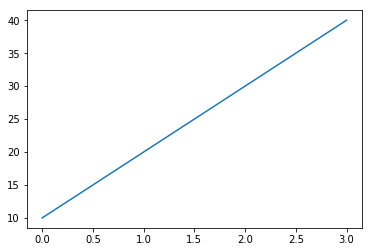

In [367]:
plt.plot([10,20,30,40]) #Y
plt.show() # print  안해도 출력되듯이 show()하지 않아도 그려집니다 

Text(0.5, 1.0, 'Graph titile')

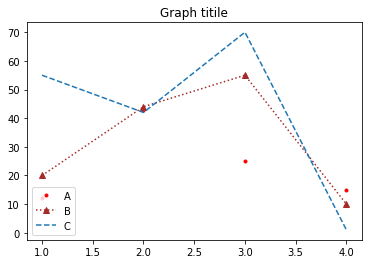

In [395]:
# 한 셀에서 여러번 plot 하면 그래프가 겹쳐집니다. 
plt.plot([1,2,3,4],[12,43,25,15],'r.', label='A') #(X,Y) , 마커모양을 바꾸면점으로 표현
plt.plot([1,2,3,4],[20,44,55,10],'g^',label='B',color='brown',linestyle=':')
plt.plot([1,2,3,4],[55,42,70,1],label='C',linestyle='--')
plt.legend(loc=3)# 범례 그려라
plt.title('Graph titile')

Text(0.5, 1.0, 'Dowjones Graph')

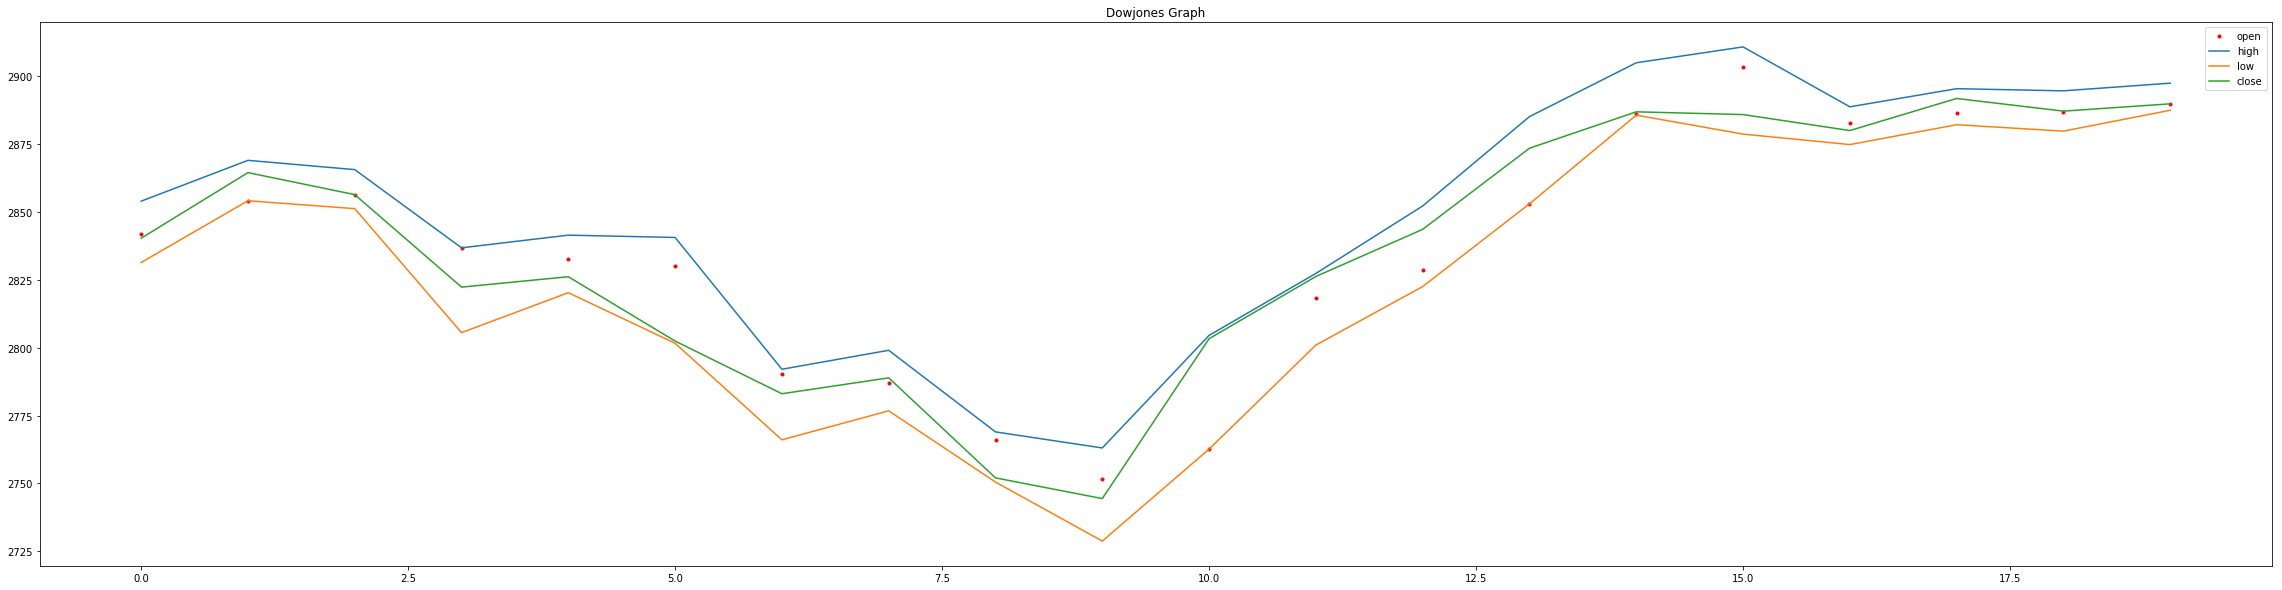

In [407]:

plt.figure(figsize=(40,10)) #inch(with, height)
plt.plot(Open,'r.', label='open')
plt.plot(high,label='high')
plt.plot(low, label='low')

plt.plot(Close, label='close')
plt.legend()
plt.title('Dowjones Graph')
